In [ ]:
# best 3 solutions based on EXP1 in turns of f1 weighted is:
# XGBcls, RoadNet+Segment TOTAL, 0.5284741533025521
# XGBreg, RoadNet+Segment NO_TOTAL, 0.541270
# GDBcls, RoadNet+Segment TOTAL, 0.5107103184755486
# with ~2014, min-max, no feature selection

In [1]:
import pandas as pd
%matplotlib inline

In [3]:
from src.experiment_based_function import SEEDS

In [101]:
def get_result(upsample_type, eval_or_grid):
    res = []

    for smote_kind in ['regular', 'svm']:
        for seed in SEEDS:
            exp_path = 'data/up_down_experiment/seed_%d' % seed
            smote_path = '%s/%s_%s' % (exp_path, upsample_type, smote_kind)
            try:
                df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
                df['seed'] = seed
                df['smote_kind'] = smote_kind
                res.append(df)
            except FileNotFoundError:
                print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    return res

In [ ]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']
keys = ['smote_kind', 'model_name', 'feature_selection']

# smote on train only

## evaluation on origin test set

In [102]:
on_train_eval_res = get_result('upsample_smote', 'eval')

no eval_res in data/up_down_experiment/seed_789729423/upsample_smote_regular
no eval_res in data/up_down_experiment/seed_291592/upsample_smote_svm
no eval_res in data/up_down_experiment/seed_789729423/upsample_smote_svm


In [103]:
means = on_train_eval_res.groupby(keys).mean()[f1_choices]
stds = on_train_eval_res.groupby(keys).std()[f1_choices]

In [104]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']
keys = ['smote_kind', 'model_name', 'feature_selection']
means = eval_res.groupby(keys).mean()[f1_choices]
stds = eval_res.groupby(keys).std()[f1_choices]

f1_type = test_f1_weighted


test_f1_weighted
smote_kind model_name feature_selection                  
svm        XGBcls     None                       0.539658
           GDBcls     mrmr                       0.533029

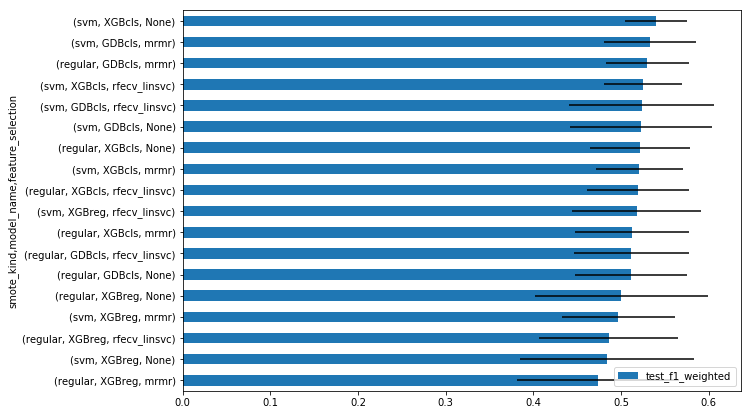

In [105]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

means_to_plot = means[[f1_type]].sort_values(f1_type, ascending=True)
stds_to_plot = stds[[f1_type]]

means_to_plot.plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
means_to_plot.iloc[:-3:-1,:]

## CV mean test score

In [100]:
on_train_grid_res = get_result('upsample_smote', 'grid')

no grid_res in data/up_down_experiment/seed_789729423/upsample_smote_regular
no grid_res in data/up_down_experiment/seed_291592/upsample_smote_svm
no grid_res in data/up_down_experiment/seed_789729423/upsample_smote_svm


In [97]:
on_train_grid_res[on_train_grid_res['kind']=='cls'].groupby(keys).mean()[['mean_test']]

mean_test
smote_kind model_name feature_selection           
regular    GDBcls     None                0.822321
                      mrmr                0.823867
                      rfecv_linsvc        0.824360
           XGBcls     None                0.810496
                      mrmr                0.806648
                      rfecv_linsvc        0.806186
svm        GDBcls     None                0.758647
                      mrmr                0.754129
                      rfecv_linsvc        0.754451
           XGBcls     None                0.746947
                      mrmr                0.746208
                      rfecv_linsvc        0.743170

# smote on whole dataset

## evaluation on smoted test set

In [106]:
on_all_eval_res = get_result('upsample_smote_onall', 'eval')

In [107]:
means = on_all_eval_res.groupby(keys).mean()[f1_choices]
stds = on_all_eval_res.groupby(keys).std()[f1_choices]

f1_type = test_f1_weighted


test_f1_weighted
smote_kind model_name feature_selection                  
regular    GDBcls     rfecv_linsvc               0.825399
                      None                       0.818661

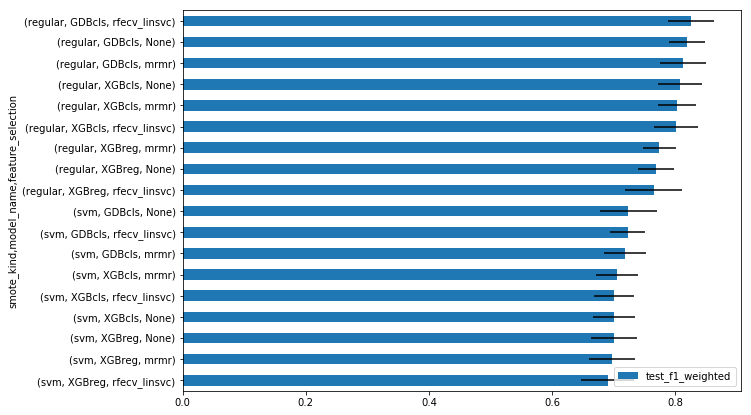

In [108]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

means_to_plot = means[[f1_type]].sort_values(f1_type, ascending=True)
stds_to_plot = stds[[f1_type]]

means_to_plot.plot(kind='barh', figsize=(10,7), xerr=stds_to_plot)
means_to_plot.iloc[:-3:-1,:]

## CV mean test score

In [109]:
on_all_grid_res = get_result('upsample_smote_onall', 'grid')

In [110]:
on_all_grid_res[on_all_grid_res['kind']=='cls'].groupby(keys).mean()[['mean_test']]

mean_test
smote_kind model_name feature_selection           
regular    GDBcls     None                0.806133
                      mrmr                0.807918
                      rfecv_linsvc        0.804298
           XGBcls     None                0.794837
                      mrmr                0.796576
                      rfecv_linsvc        0.785247
svm        GDBcls     None                0.726119
                      mrmr                0.727299
                      rfecv_linsvc        0.724671
           XGBcls     None                0.726523
                      mrmr                0.725789
                      rfecv_linsvc        0.716802